## 5. Feladatsor (Runge-Kutta módszerek)

**Differenciálegyenlet**

Most is csak autonóm egyenletekkel foglalkozunk, azaz legyen

$$ \dot x(t) = f(x(t)).$$

Ekkor persze
$$
x(s) = x(0) + \int\limits_0^s f(x(\tau)) \, d\tau.
$$

A folytonos dinamikai rendszer állapotterét $s$ idővel előretoló operátor legyen
$$\phi(s, x_0) = x_0 + \int\limits_0^s f(\phi(\tau, x_0)) \, d\tau,$$
ahol $x_0$ a kezdeti állapot.

**Diszkretizáció**

Közelítsük a folytonos rendszert egy diszkrét rendszerrel a következőképpen. 

Válasszunk egy $h > 0$ lépéshosszt, szemelőtt tartva, hogy diszkrét rendszer időben eggyel való előretolásával a folytonos rendszer $h$ hosszú lépését kívánjuk közelíteni.

Hozzunk tehát létre egy diszkrét dinamikai rendszert, mely esetén az időt (eggyel) előretoló operátort jelöljük $\phi_h(x_0)$ módon.

Az explicit-Euler módszer estetén $\phi_h$ alakja a következő:

$$ \phi_h(x_0) = x_0 + hf(x_0).$$

A lineáris tesztegyenlet, azaz $f(x) = \lambda x$ esetén például

$$ \phi_h(x_0) = x_0 + hf(x_0) = (1 + z)x_0, $$
ahol $z = \lambda h$.

A célunkat tehát úgy is megfogalmazhatjuk, hogy a $\phi(h, \cdot)$ függvényt szeretnénk közelíteni egy alkalmas $\phi_h$ függvénnyel. Ilyen közelítésre kínál egy lehetőséget a Runge-Kutta módszerek családja. 

A lineáris tesztegyenlet esetén az előbbi függvény $x \mapsto e^z x$, aminek egy elsőrendű közelítése az $x \mapsto (1+z)x$ függvény, mely pont az EE módszerhez tartozó $\phi_h$.

**Runge-Kutte módszerek**

Az $s$-lépcsős RK módszert definiáló $b_i, c_i, a_{ij}$ együtthatók $(i,j=1\ldots s)$ ismeretében a módszert megadó formula a következő:

$$Y_i = x_0 + \sum\limits_{j=1}^s a_{ij} hf(Y_j),$$

$$x_1 = x_0 + \sum\limits_{j=1}^s b_i hf(Y_i).$$

**Butcher-tabló**

Az együtthatókat szokás egy ún. Butcher-tablóba gyűjteni, melynek alakja 
<table style="text-align: center" cellspacing="0" cellpadding="3">
<tbody>
<tr>
<td style="border-right:1px solid; border-bottom:1px solid;">$c$</td>
<td style="border-bottom:1px solid;">$A$</td>
</tr>
<tr>
<td style="border-right:1px solid;"></td>
<td>$b^T$</td></tr></tbody></table>

ahol tehát $A, b, c$ az együtthatókból képzett mátrix, illetve vektorok. Kétlépcsős esetben például a tabló általános alakja a következő:
<table style="text-align: center" cellspacing="0" cellpadding="3">
<tbody><tr>
<td style="border-right:1px solid;">$c_1$
</td>
<td>$a_{11}$</td>
<td>$a_{12}$</td>
</tr>
<tr>
<td style="border-right:1px solid; border-bottom:1px solid;">$c_2$</td>
<td style="border-bottom:1px solid;">$a_{21}$</td>
<td style="border-bottom:1px solid;">$a_{22}$</td></tr>
<tr>
<td style="border-right:1px solid;"></td>
<td>$b_1$</td>
<td>$b_2$
</td></tr></tbody></table>

### 1. Feladat

Runge-Kutta módszerek-e az alábbiak? Ha igen, mi a Butcher-tablójuk?

a) $$ x_1 = x_0 + hf(x_0) $$

In [ ]:
A = [0], b = [1]

b) $$ x_1 = x_0 + hf(x_1) $$


In [ ]:
A = [1], [b] = 1


c) $$ Y_1 = x_0 + hf(x_0) $$

$$ Y_2 = x_0 + hf(Y_2) $$

$$ x_1 = x_0 + \frac{h}{2}\left(f(Y_1) + f(Y_2)\right)$$


In [3]:
# (odakepzelhetjuk az Y_0 = x0 sort)

A = [0 0 0
     1 0 0
     0 1 0]

b = [0, 1/2, 1/2]

3-element Vector{Float64}:
 0.0
 0.5
 0.5

d) $$ Y_1 = x_0 + \frac{h}{2} f(Y_1) $$
$$ x_1 = Y_1 + \frac{h}{2}f(Y_1) $$

In [4]:
# Y1 = x0 + h/2 f(Y_1)
# x1 = x0 + hf(Y_1)

A = [1/2]
b = [1]

1-element Vector{Int64}:
 1

e)

$$ x_1 = x_0 + \frac{h}{2}\left( f(x_0) + f(x_1) \right) $$

In [5]:
# (I - h/2f)(x_1) = (I + h/2f)(x_0)
#
# Y_1 = x_0
# (I - h/2f)(Y_2) = x0 + h/2f(Y_1)
#
# x1 = x0 + h/2 ( f(Y_1) + f(Y_2) )

A = [0   0
    1/2 1/2]

b = [1/2, 1/2]

2-element Vector{Float64}:
 0.5
 0.5

### 2. Feladat

Írjuk fel az alábbi módszereket megadó formulákat a módszerek Butcher-tablója alapján!

a)

<table style="text-align: center" cellspacing="0" cellpadding="3">
<tbody>
<tr>
<td style="border-right:1px solid; border-bottom:1px solid;">1</td>
<td style="border-bottom:1px solid;">1/2</td>
</tr>
<tr>
<td style="border-right:1px solid;"></td>
<td>1</td></tr></tbody></table>

$$ Y_1 = x_0 + h/2f(Y_1)$$
$$ x_1 = x_0 + hf(Y_1) $$

b)
<!-- Forras: https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods -->
<table style="text-align: center" cellspacing="0" cellpadding="3">
<tbody><tr>
<td style="border-right:1px solid;">0
</td></tr>
<tr>
<td style="border-right:1px solid; border-bottom:1px solid;">1/2</td>
<td style="border-bottom:1px solid;">1/2</td>
<td style="border-bottom:1px solid;">
</td></tr>
<tr>
<td style="border-right:1px solid;"></td>
<td>0</td>
<td>1
</td></tr></tbody></table>

$$
\begin{align*}
Y_1 &= x_0 \\
Y_2 &= x_0 + h/2f(Y_1) \\
x_1 &= x_0 + hf(Y_2) 
\end{align*}
$$


<!-- Forras: https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods -->

c) 
<table style="text-align: center" cellspacing="0" cellpadding="3">
<tbody><tr>
<td style="border-right:1px solid;">0
</td></tr>
<tr>
<td style="border-right:1px solid;">1/2</td>
<td>1/2
</td></tr>
<tr>
<td style="border-right:1px solid;">1/2</td>
<td>0</td>
<td>1/2
</td></tr>
<tr>
<td style="border-right:1px solid; border-bottom:1px solid;">1</td>
<td style="border-bottom:1px solid;">0
</td>
<td style="border-bottom:1px solid;">0</td>
<td style="border-bottom:1px solid;">1
</td>
<td style="border-bottom:1px solid;">
</td></tr>
<tr>
<td style="border-right:1px solid;"></td>
<td>1/6</td>
<td>1/3</td>
<td>1/3</td>
<td>1/6
</td></tr></tbody></table>

$$
\begin{align*}
Y_1 &= x_0 \\
Y_2 &= x_0 + h/2f(Y_1) \\
Y_3 &= x_0 + h/2f(Y_2) \\
Y_4 &= x_0 + hf(Y_3) \\
    & \\
x_1 &= x_0 + h(f(Y_1) + 2f(Y_2) + 2f(Y_3) + f(Y_4))/6
\end{align*}
$$

d)

<!-- Forras: https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods -->
<table style="text-align: center" cellspacing="0" cellpadding="3">
<tbody><tr>
<td style="border-right:1px solid;">0
</td></tr>
<tr>
<td style="border-right:1px solid; border-bottom:1px solid;">1</td>
<td style="border-bottom:1px solid;"></td>
<td style="border-bottom:1px solid;">1</td></tr>
<tr>
<td style="border-right:1px solid;"></td>
<td>1/2</td>
<td>1/2</td></tr></tbody></table>

$$
\begin{align*}
    Y_1 &= x_0 \\
    Y_2 &= x_0 + hf(Y_2) \\
    & \\
    x_1 &= x_0 + h\frac12(f(Y_1) + f(Y_2))
\end{align*}
$$

e)

<table style="text-align: center" cellspacing="0" cellpadding="3">
<tbody><tr>
<td style="border-right:1px solid;">0
</td></tr>
<tr>
<td style="border-right:1px solid; border-bottom:1px solid;">1</td>
<td style="border-bottom:1px solid;">1/2</td>
<td style="border-bottom:1px solid;">1/2</td></tr>
<tr>
<td style="border-right:1px solid;"></td>
<td>1/2</td>
<td>1/2</td></tr></tbody></table>

$$
\begin{align*}
    Y_1 &= x_0 \\
    Y_2 &= x_0 + h/2\left(f(Y_1) + f(Y_2)\right) \\
    & \\
    x_1 &= x_0 + h/2(f(Y_1) + f(Y_2))
\end{align*}
$$

### 3. Feladat

Oldjuk meg az alábbi kezdetiérték-problémát
$$
\begin{cases}
\dot x &= x \\
     x(0) &= 1
\end{cases}
$$
az EE módszerrel, $h=0.1$ lépéshosszal. 

Ábrázoljuk a kapott numerikus trajektóriát, valamint a pontos megoldás trajektóriáját is.

In [123]:
function ee_step(x)
    return x + 0.1*x
end

ee_step (generic function with 2 methods)

In [124]:
using .Iterators

In [125]:
function iterate(f, x0)
    return Iterators.accumulate(f ∘ ((x, y) -> x), Iterators.repeated(x0))
end

iterate (generic function with 1 method)

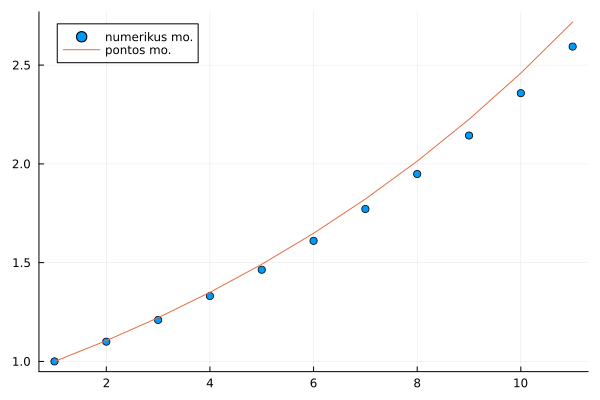

In [128]:
plot()
scatter!(collect(take(iterate(ee_step, 1), 11)), label="numerikus mo.")
plot!(map(t -> exp(t), range(0, 1, 11)), label="pontos mo.")

### 4. Feladat
Tekintsük az
$$\ddot x = - x$$
egyenletet. 

a) Vezessük vissza egy elsőrendű rendszerre.

b) Ábrázoljuk a kapott vektormezőt az egységnégyzeten a `quiver` utasítással.

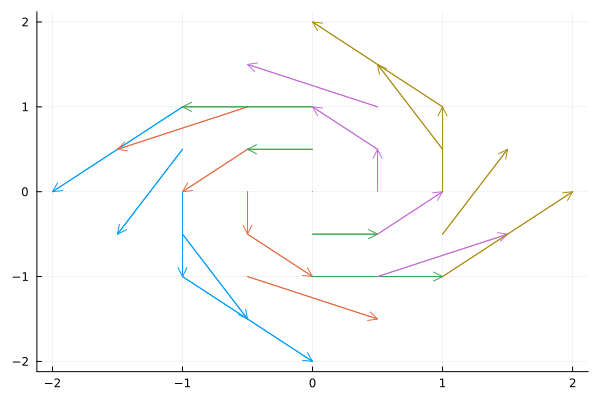

In [59]:
N = 5
xs = range(-1, 1, length=N)

# meshgrid-del egyszerűbb
xx = (ones(1, N) .* xs)'

quiver(xx, xx', quiver=(-xx', xx))

c) Alkalmazzuk erre a rendszerre a korábbi feladatokban szereplő módszerek közül az alábbiakat:

 1. 1/a),
 2. 1/b),
 3. 2/c).


d) Végezetül készítsünk egy ábrát, melyen összehasonlítjuk a három módszer által adott, $[0, 2\pi]$ időintervallumhoz tartozó trajektóriákat (a fázistérben), például $h=0.01\pi$ lépéshossz mellett.

In [51]:
using LinearAlgebra

In [52]:
function ee_step(A, h, x)
    return x + h*A*x
end

ee_step (generic function with 1 method)

In [53]:
function ie_step(A, h, x)
    return (I - h*A)\x
end

ie_step (generic function with 1 method)

In [98]:
function rk4_step(A, h, x)
    R1 = I
    R2 = I + h/2*A*R1
    R3 = I + h/2*A*R2
    R4 = I + h*A*R3
    
    return (I + h/6*A*(R1 + 2*R2 + 2*R3 + R4))*x
end

rk4_step (generic function with 1 method)

In [76]:
function discretize(A, h, time_step)
    return x -> time_step(A, h, x)
end

discretize (generic function with 1 method)

In [77]:
A = [0  1
     -1 0]

2×2 Matrix{Int64}:
  0  1
 -1  0

In [88]:
discretize(A, 0.01*pi, rk4_step)([0,1])

2-element Vector{Float64}:
 0.0004934396329332038
 1.0314107588231178

In [82]:
using Plots

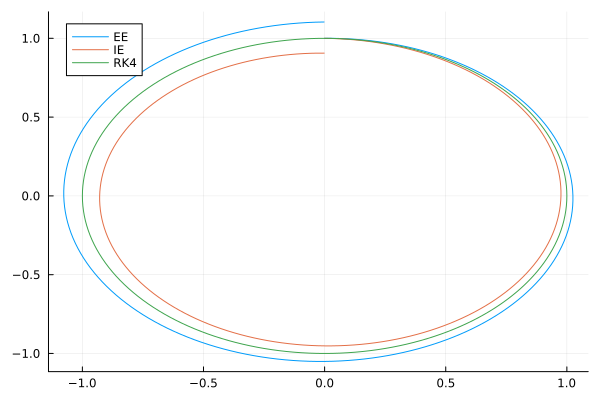

In [130]:
p = plot()
for (label, time_step) = zip(["EE", "IE", "RK4"], [ee_step, ie_step, rk4_step])

    phi_h = discretize(A, 0.01*pi, time_step)
    
    trajectory = iterate(phi_h, [0,1])
    first_few_steps = take(trajectory, 201)
    
    xys = collect(first_few_steps)'

    plot!(map(first, xys)', map(last, xys)', label=label)
end
display(p)

### 6. Feladat

Tekintsük az explicit, háromlépcsős RK-módszert definiáló formulák hatását az
$$ \dot x = Ax $$
egyenletre, ahol $A$ egy megfelelő méretű mátrix.

a) Írjuk fel az RK-módszert definiáló egyenleteket ezen feladatra specializálva.

Itt $a_{ij}$ az Rk-módszer Butcher-mátrixának együtthatóit jelöli. A fenti $A$ mátrixhoz (tipikusan) nincs köze ezeknek.

$$
\begin{align*}
Y_1(h) &= x_0 + \sum\limits_{j=1}^{1-1} a_{1j} hA Y_j = x_0,  \\
Y_2(h) &= x_0 + \sum\limits_{j=1}^{2-1} a_{2j} hA Y_j = x_0 + a_{21} hA Y_1 = (I + a_{21}hA)x_0, \\
Y_3(h) &= x_0 + \sum\limits_{j=1}^{3-1} a_{3j} hA Y_j = x_0 + a_{31} hA Y_1 + a_{32} hA Y_2 = I + a_{31}hAx_0 + a_{32} hA (I + a_{21}hA)x_0, \\
&\\
x_1(h) &= x_0 + \sum\limits_{j=1}^s b_i hA Y_i = \left( I + hA\left(b_1 I + b_2 (I+ a_{21}hA) + b_3 \left(I + a_{31}hA + a_{32} hA (I + a_{21}hA) \right) \right) \right) x_0 \\
\end{align*}
$$

b) Milyen rendben közelíthetik az egyenlet pontos megoldását az $Y_1, Y_2, Y_3, x_1$ függvények? Adjunk a lehetséges rendekhez tartozó rendfeltételeket. Ennek módja: fejtsük Taylor-sorba mind az említett függvényeket, mind a pontos megoldást.

A pontos megoldas, $x(h) = e^{Ah}x_0$ Taylor-sora a $h=0$ korul def. szerint $$\left(I + hA + \frac{h^2A^2}{2} + \frac{h^3A^3}{6} + \frac{h^4A^4}{24} + \ldots \right)x_0.$$

Ezzel kellene összevetni a fenti függvények $0$ körüli Taylor-sorát. Mivel a fenti függvények polinomok $h$-ban, ezért ezek praktikusan már sorba is vannak fejtve (csak ki kell bontani a zárójeleket).

Például $Y_2$ legfeljebb elsőrendű közelítés lehet, és ahhoz, hogy az legyen, szükséges, hogy $a_{21} = 1$ legyen.

Hasonlóan, $Y_3$ legfeljebb másodrendű lehet, ehhez pedig arra van szükség, hogy $(a_{31} + a_{32}) = 1, a_{32} a_{21} = \frac12 $ legyen, hiszen

$$ Y_3(h) = \left( I + (a_{31} + a_{32})hA + a_{32}a_{21} h^2A^2  \right) x_0. $$

$x_1$ legfeljebb harmadrendű lehet, ehhez pedig arra van szükség, hogy
$$
\begin{align*}
b_1 + b_2 + b_3 &= 1 \\
b_2 a_{21} + b_3 a_{31} & = 1/2 \\
b_3 a_{32} a_{21} &= 1/6.
\end{align*}
$$